In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

data = pd.read_csv('vehicle.csv')

plt.scatter(data['length'][data['label']=='car'], data['width'][data['label']=='car'], c='g')
plt.scatter(data['length'][data['label']=='truck'], data['width'][data['label']=='truck'], c='r')
plt.xlabel('length')
plt.ylabel('width')
plt.legend(['car', 'truck'])


Text(0.5, 0, 'length')

Text(0, 0.5, 'width')

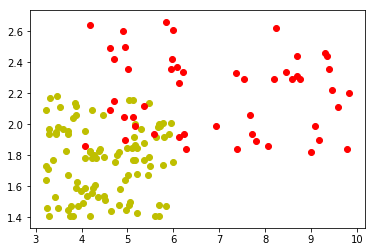

In [2]:
plt.scatter(data['length'][data['label']=='car'],data['width'][data['label']=='car'],c='y')
plt.scatter(data['length'][data['label']=='truck'],data['width'][data['label']=='truck'],c='r') 

In [4]:
test = [4.7, 2.1]

feature = np.array(data.iloc[:,0:2])
labels = data['label'].tolist()
### step 1 , caculate distance ###
numSamples = data.shape[0]
diff = np.tile(test,(numSamples, 1)) - feature
# np.tile(test,(numSamples, 1))

In [5]:
squareDiff = diff**2
squreDist = np.sum(squareDiff, axis = 1)
distance = squreDist ** 0.5
### step2 , sort the distances ###
sortedDistIndices = np.argsort(distance) # 返回的是值对应的索引（升序）
sortedDistIndices

array([  4,  26,   3,  21,  53,  73,  51,  39,  37,  62,  84,  95, 123,
       102, 101,  78, 148, 106, 108,  36,  86,  66, 147,  31,  24,  75,
        60, 109,  93, 130,  45, 116, 111,   8, 131,   1,  41,  17,  30,
       100,  52, 140,  81,  82, 142, 128, 132,  34,  64,  71,  91,  15,
       145,  22,  25, 134,  99,  89, 124,  57,  94,  63, 141,   9,  10,
        49,  18, 112, 110,  14,  77, 149,  58,  90,  68, 114,  56, 146,
       127,  35,  67,  59,  27,  11, 138, 117, 137,  32,  43,  70,  76,
        38,  23,  98, 105,  92, 136,  47,   6, 126, 104,  61,  97,   5,
       133,   2,   7, 113,   0,  96, 144,  13,  87,  20,  54, 125, 115,
        33,  40, 139, 119,  28,  80,  83, 135,  65,  16,  74, 121, 143,
       122,  50,  55, 120,  19,  46,  48,  79,  69, 107,  44,  88, 129,
       103, 118,  85,  12,  42,  72,  29], dtype=int64)

In [7]:
### step 3 , find the K nearest points ###

k = 9 

classCount = {}
label_count = []

for i in range(k):
    voteLabel = labels[sortedDistIndices[i]]
    classCount[voteLabel] = classCount.get(voteLabel ,0) + 1
    label_count.append(voteLabel)

### step 4 , count the numbers and get the result ###

from collections import Counter

word_counts = Counter(label_count)
top = word_counts.most_common(2)
label_count
top


['truck', 'truck', 'truck', 'car', 'car', 'car', 'truck', 'truck', 'car']

[('truck', 5), ('car', 4)]